### **Problem Statement**
Grouping customers based on purchasing behavior

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #kMeans is used to group the customers in clusters

In [3]:
#Data Collection and Analysis
cust_data=pd.read_csv("/content/drive/MyDrive/Datasets/Customer Segmentation Data/Mall_Customers.csv")
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
cust_data.shape

(200, 5)

In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Let's cluster the customers based on Annual Income and Spending Score
cust_data=cust_data.iloc[:,3:].values
cust_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
#Choose the number of clusters using Elbow Method - wcss (Within Clusters Sum of Squares)
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(cust_data)
  wcss.append(kmeans.inertia_) #this gives the wcss value for each number of clusters

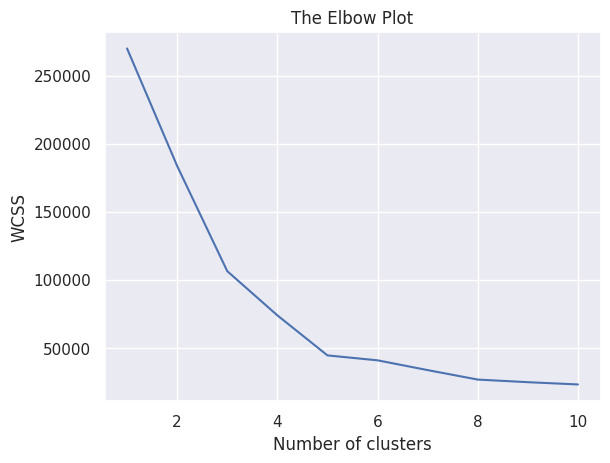

In [8]:
# Create a Elbow plot to get the number of clusters
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **Inferences from Elbow Method**
We can see 2 suitable clusters in the Elbow Graph at 3 and 5, but when we have 2 possible values we will take the 2nd one. So, here the optimal number of clusters we will be considering is 5.

In [11]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

#label each datapoint based on their cluster

Y_kmeans=kmeans.fit_predict(cust_data)
print(Y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


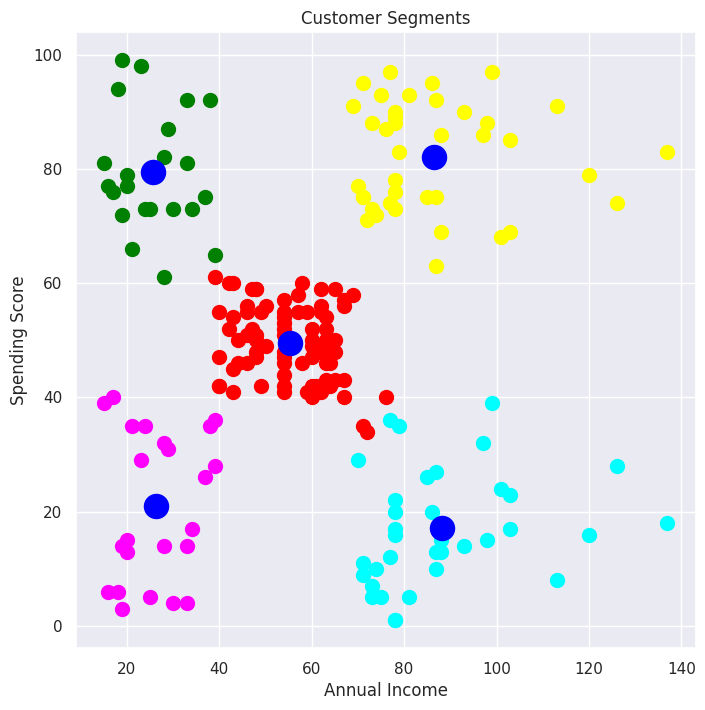

In [14]:
#Visualize Clusters
plt.figure(figsize=(8,8))
#The first index of Y_means represent the cluster number and 2nd index represnts the indexes of the cust_data i.e, 0 means Annual Income and 1 means Spending Score
plt.scatter(cust_data[Y_kmeans==0,0],cust_data[Y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(cust_data[Y_kmeans==1,0],cust_data[Y_kmeans==1,1],s=100,c='yellow',label='Cluster 2')
plt.scatter(cust_data[Y_kmeans==2,0],cust_data[Y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(cust_data[Y_kmeans==3,0],cust_data[Y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(cust_data[Y_kmeans==4,0],cust_data[Y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue',label='Centroids')

plt.title("Customer Segments")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

#**Inferences**
We can understand that customers are divided into 5 clusters :
* Cluster 1 - Moderate Annual Income and Moderate Spending - red
* Cluster 2 - High Annual Income and High Spending - yellow
* Cluster 3 - Low Annual Income and High Spending - Green
* Cluster 4 - High Annual Income and Low Spending - Cyan
* Cluster 5 - Low Annual Income and Low Spending - Magenta

From this Clustering Technique, The Mall or Shop can give an offer or membership cards for the categories who are not spending much and increase the sales and customer satisfaction.